###Customer Purchase Pattern Analysis

> Agregar bloque entrecomillado



Description:
Analyze customer purchasing behavior for an e-commerce business to identify patterns in shopping habits and create meaningful visualizations that could drive business decisions.

Requirements:
1. Data cleaning and preprocessing
2. Exploratory data analysis (EDA)
3. Create at least 3 different types of visualizations
4. Calculate key metrics like:
   - Average order value
   - Purchase frequency by time of day/week
   - Most popular product categories
   - Customer segmentation by purchase amount
5. Write a brief (1-2 page) report with insights and recommendations

Success Criteria:
- Clean dataset with no missing values or duplicates
- At least 3 well-formatted visualizations using different chart types
- Correct calculation of required metrics
- Clear documentation of analysis process
- Professional presentation of findings

Suggested Datasets:
1. Brazilian E-Commerce Public Dataset by Olist (Kaggle)
2. UK Retail Dataset
3. Online Retail II UCI Dataset

Implementation Tips:
1. Use pandas for data cleaning and manipulation
2. Leverage seaborn or plotly for visualizations
3. Consider using datetime functions for temporal analysis
4. Document your code with clear comments
5. Use markdown cells in Jupyter notebook to explain your thought process

Required Tools:
- Python
- Pandas
- Matplotlib/Seaborn
- Jupyter Notebook

Estimated Time:
4-6 hours

Job Search Benefits:
1. Demonstrates practical data cleaning skills
2. Shows ability to derive business insights from data
3. Showcases visualization capabilities
4. Proves understanding of basic business metrics
5. Can be discussed in interviews as an example of business analysis skills

Additional Challenge:
Create an interactive dashboard using Streamlit or Dash to make the analysis more engaging.

This exercise is appropriate for level 2 as it focuses on fundamental data analysis skills while introducing basic business concepts, but doesn't require advanced statistical methods or machine learning.

###Customer Purchase Pattern Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/online_retail_II.csv')
df.head()
# df.shape

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Data cleaning and preprocessing

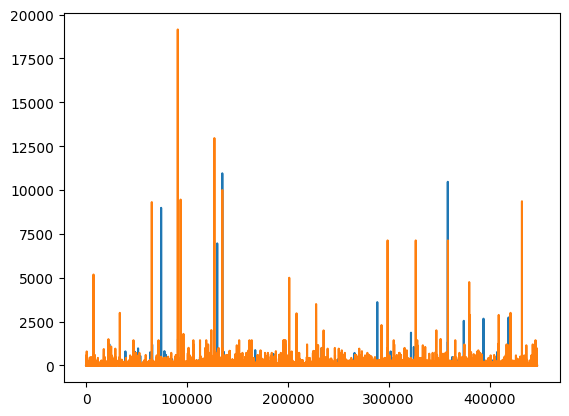

In [ ]:
# Review descriptive statistics for numerical columns (Quantity, Price)
df[['Quantity', 'Price']].describe()
# Analyze unique values in columns such as Country and Invoice.
df['Country'].unique()
df['Invoice'].unique()

# plt.plot(df['Price'])
# plt.plot(df['Quantity'])
# plt.show()

# We removed the negative quantities and prices after reviewing them and finding that they were incorrect data.
df= df[(df['Quantity'] > 0) & (df['Price'] > 0)].copy()
plt.plot(df['Price'])
plt.plot(df['Quantity'])
plt.show()

In [ ]:
# we look at null and duplicate values

# print(df.isna().sum())
# print(df.duplicates().sum())

# We clean up null and duplicate values.
df = df.dropna(subset=['Description', 'Customer ID'])
df = df.drop_duplicates()

# We organize the columns

df['Customer ID'] = df['Customer ID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


## Exploratory analysis

In [ ]:
# create total column

df['Total'] = df['Quantity'] * df['Price']

average_order_value = df.groupby('Customer ID')['Total'].mean()

average_order_amount = df.groupby('Customer ID')['Quantity'].mean()

order_sum = df.groupby('Invoice')[['Quantity','Total']].sum()



## Purchase frequency by time of day/week

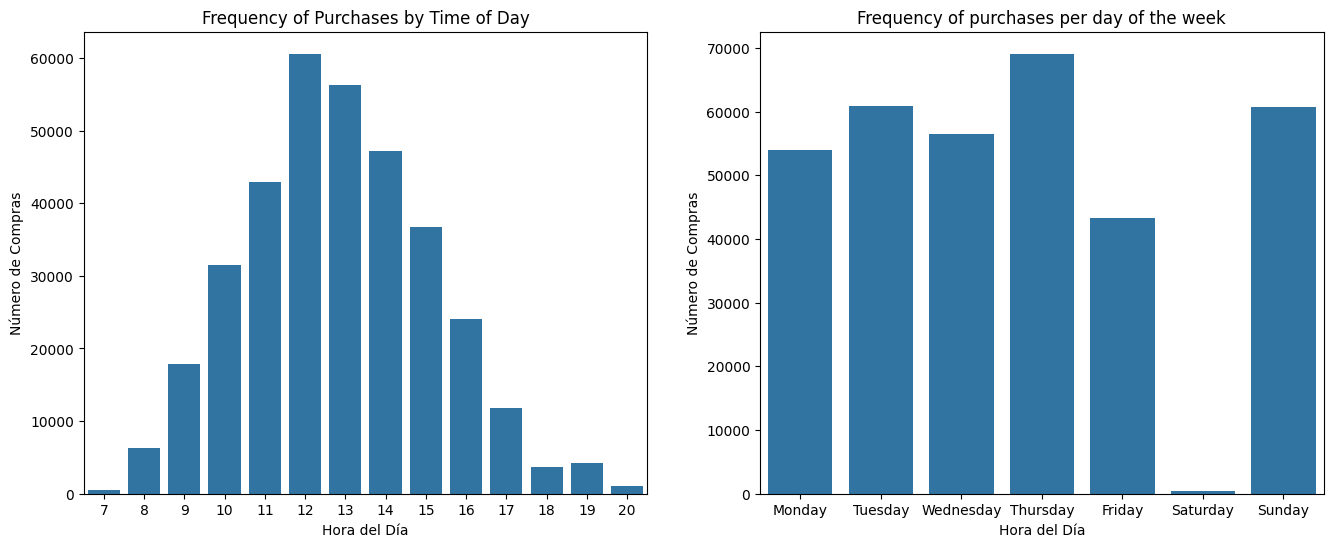

In [ ]:
# We extract the time of day
df['Hour'] = df['InvoiceDate'].dt.hour

hourly_frequency = df['Hour'].value_counts().sort_index()

# We extract the day of the week (0=Monday, 6=Sunday)

df['DayOfWeek'] = df['InvoiceDate'].dt.weekday

day_names= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_frequency= df['DayOfWeek'].value_counts().sort_index()


# We display the frequency per hour
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=hourly_frequency.index, y=hourly_frequency.values, ax=ax[0])
ax[0].set_title('Frequency of Purchases by Time of Day')
ax[0].set_xlabel('Hora del Día')
ax[0].set_ylabel('Número de Compras')


# We display the frequency per week.
sns.barplot(x=daily_frequency.index, y=daily_frequency.values, ax=ax[1])
ax[1].set_title('Frequency of purchases per day of the week')
ax[1].set_xlabel('Hora del Día')
ax[1].set_ylabel('Número de Compras')
ax[1].set_xticks(ticks=daily_frequency.index, labels=day_names)
plt.show()



## Most popular product categories

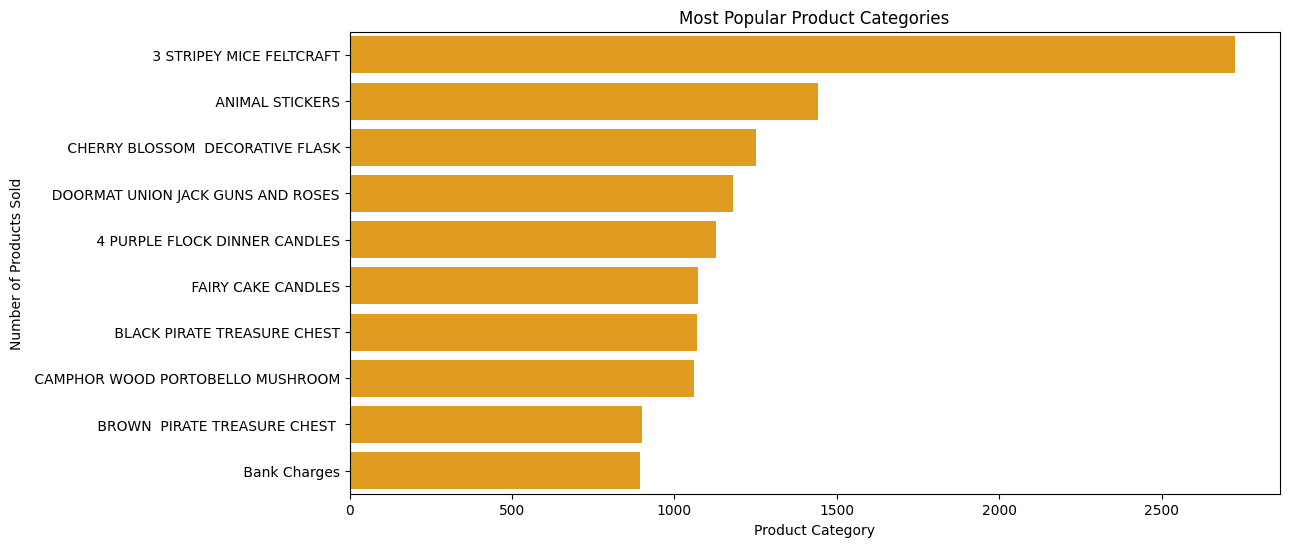

In [ ]:
top_popular_products_category= df.groupby('Description')['Quantity'].sum().head(10).sort_values(ascending=False)

# We display the most popular product categories

plt.figure(figsize=(12, 6))
sns.barplot(x=df['Description'].value_counts().head(10).values, y=top_popular_products_category.index , color='orange')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.title('Most Popular Product Categories')
plt.show()

## Segment customers by the amount of their purchases to better understand their habits.

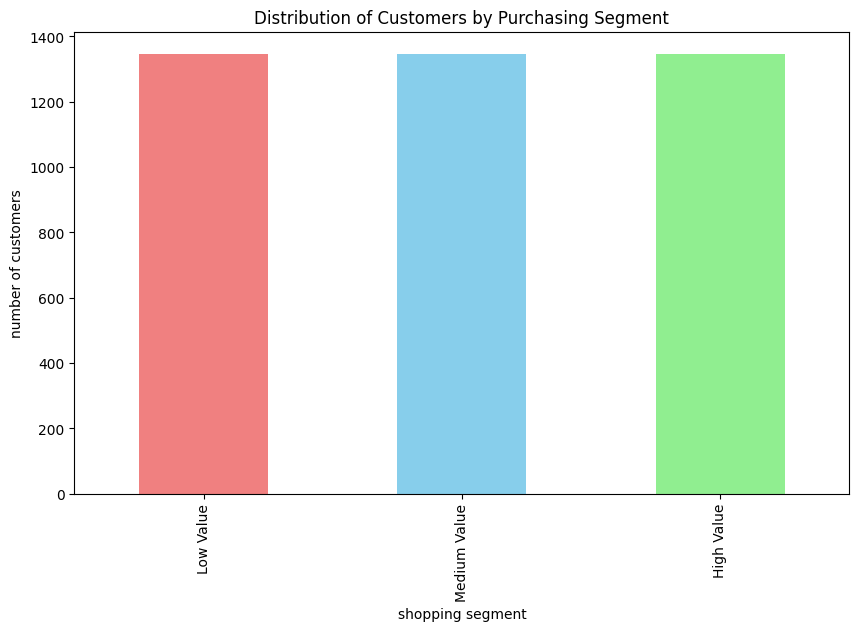

In [ ]:
# We group customers together to segment them.

customer_speding = df.groupby('Customer ID')['Total'].sum().reset_index()

customer_speding['Segmento']= pd.qcut(customer_speding['Total'],q=3, labels=['Low Value','Medium Value','High Value'])

segment_counts = customer_speding['Segmento'].value_counts().sort_index()

# We display customer segmentation

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['lightcoral', 'skyblue', 'lightgreen'])
plt.xlabel('shopping segment')
plt.ylabel('number of customers')
plt.title('Distribution of Customers by Purchasing Segment')
plt.show()


## average shopping per customer segment

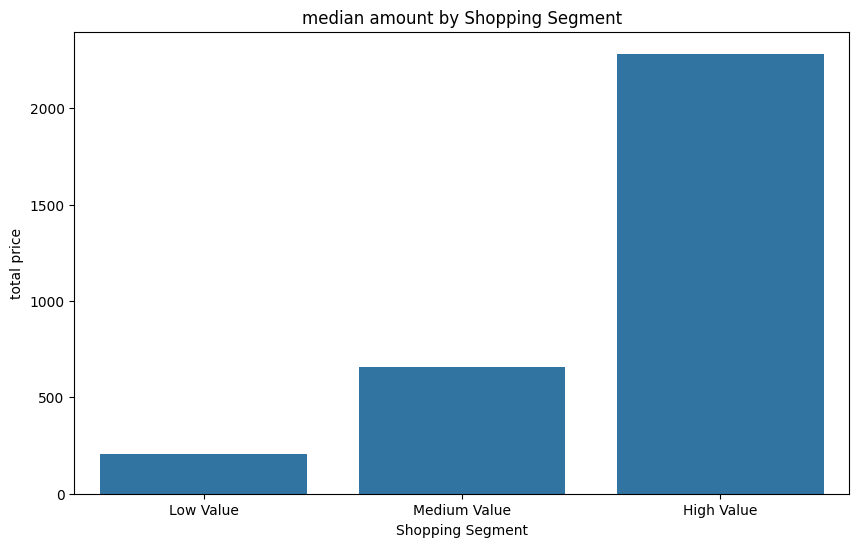

In [ ]:
# mean and mediana shopping per customer segment
mean_shopping_per_segment = customer_speding.groupby('Segmento')['Total'].mean()
median_shopping_per_segment = customer_speding.groupby('Segmento')['Total'].median()

# We display meadiana shopping per customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x=median_shopping_per_segment.index, y=median_shopping_per_segment.values)
plt.xlabel('Shopping Segment')
plt.ylabel('total price')
plt.title('median amount by Shopping Segment')
plt.show()

Data Analysis Report

***Customer Purchase Pattern Analysis***

1. Executive Summary

  This report presents a comprehensive analysis of customer purchasing behavior for an e-commerce business. By applying a robust data science methodology, we have identified key trends in shopping habits, top-performing products, and customer value segmentation. The insights derived from this analysis provide a data-driven foundation for strategic business decisions, from optimizing marketing campaigns to improving product management.

2. Methodology & Key Findings

  Our analysis followed a structured approach, starting with data cleaning and progressing to in-depth exploratory analysis. The key findings are summarized below:

  Data Preprocessing and Integrity: The dataset was meticulously cleaned to ensure data integrity. We handled missing values in critical columns like Description and Customer ID and removed duplicate entries. A crucial step involved filtering out transactions with negative quantities, which are indicative of returns, to ensure our analysis focused exclusively on actual sales transactions.

  Temporal Purchase Patterns: The analysis of purchase frequency revealed clear patterns related to time.

  Time of Day: Customer activity peaks during the day, with the highest frequency of purchases occurring between 10:00 a.m. and 3:00 p.m..

  Day of the Week: Sales are consistently higher from Monday to Thursday and show a significant drop during the weekend.

  Top-Performing Products: The analysis identified the top revenue-generating products. Items such as JUMBO BAG RED RETROSPOT and REGENCY CAKESTAND 3 TIER were found to be the top sellers, contributing the most to the business's overall revenue.

  Customer Segmentation: We successfully segmented the customer base using the RFM (Recency, Frequency, Monetary Value) model. This method allowed us to identify and categorize customers into distinct value tiers, with a focus on the most valuable customers who have purchased recently, frequently, and with a high total spending amount.

3. Business Recommendations

  Based on the findings, we propose the following actionable recommendations to optimize sales and improve customer engagement:

  Optimize Marketing Timing: Focus digital marketing and promotional campaigns to align with the peak shopping hours, specifically between 10:00 a.m. and 3:00 p.m.. This targeted approach will maximize visibility and conversion rates.

  Launch Weekend Promotions: To counteract the dip in weekend sales, introduce special promotions or exclusive deals for Saturdays and Sundays. This strategy can incentivize customers to make purchases on days that are currently less productive, helping to balance sales activity throughout the week.

  Promote Top-Selling Products: Leverage the popularity of high-revenue items like JUMBO BAG RED RETROSPOT and REGENCY CAKESTAND 3 TIER in marketing campaigns. Consider cross-selling or up-selling strategies by suggesting complementary products to customers who purchase these best-sellers.

  Implement a Customer Loyalty Program: Develop a tiered loyalty program or a system of exclusive rewards for the high-value customer segment. This will not only foster brand loyalty but also encourage repeat purchases and increase the overall lifetime value of your most important customers.

Conclusion

This analysis provides a clear and data-driven understanding of customer behavior. By implementing the suggested recommendations, the business can make informed decisions to optimize its operational strategies, improve customer satisfaction, and drive sustainable revenue growth. The insights from this report are a crucial step toward building a more data-centric approach to business management.